In [1]:
from utils.MR import *
import glob
import sdds
import matplotlib.pyplot as plt

In [2]:
mat_folder='./mr'
SPSuser_list = os.listdir(mat_folder)

In [3]:
get_average_profile_plotting()

ok


NameError: name 'beams' is not defined

In [4]:
for SPSuser in SPSuser_list:
    list_mr_files = os.listdir(mat_folder +'/'+ SPSuser) # exclude .ipynb.checkpoints file
    files2ignore = ['.ipynb_checkpoints']
    N_cycles = len(list_mr_files)
    print('ok')
    for ii in range(N_cycles): # range() behaves like xrange() in python2
            
        filename_mr = list_mr_files[ii]
        if filename_mr not in files2ignore:
            
            tstamp_mat_filename = ((filename_mr.split('_')[-1]).split('.mat')[0])

            if tstamp_mat_filename in beams[SPSuser]['timestamp_float']:
                continue
            try:
                #print(f'{SPSuser}, {ii}, {N_cycles-1}') #'%s %d/%d'%(SPSuser, ii, N_cycles - 1)
                curr_mr = MountainRange(mat_folder +'/'+ SPSuser +'/'+ filename_mr)              

SyntaxError: unexpected EOF while parsing (<ipython-input-4-ec8e987d6c7b>, line 17)

In [3]:
path2files='SMR.SCOPE13.CH01@Acquisition/' # path to MR data, they should be unziped (.sdds)

In [4]:
files_list = sorted(glob.glob(path2files+'*')) # create a list with all the MR data

In [10]:
sdds_data = sdds.read(files_list[20])

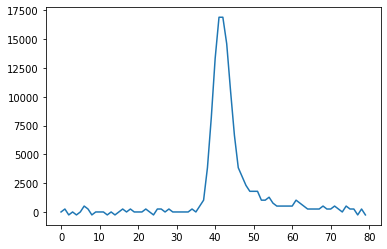

In [20]:
plt.plot(sdds_data.values['value'][0])

In [85]:
timestamps = sdds_data.values['triggerStamp']
my_profiles = sdds_data.values['value']
print(len(my_profiles))

50


80


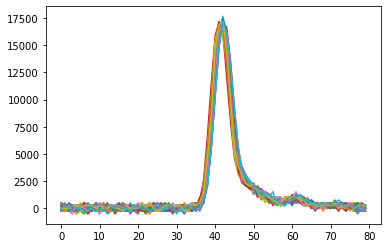

In [79]:
for i in range(len(my_profiles)):
    plt.plot(my_profiles[i])
    if i ==0:
        print(len(my_profiles[i]))

In [78]:
test= my_profiles[-20:,:]
len(test)

20

In [90]:
print(str(datetime.fromtimestamp(timestamps[0]/1e9))) # Y-M-D
print(str(datetime.fromtimestamp(timestamps[-1]/1e9))) # Y-M-D

2021-09-14 21:39:19.346021
2021-09-14 21:39:19.347151


In [74]:
def get_average_profile(my_profiles):
    average_profile = np.mean(my_profiles[-20:,:],axis=0)
    baseline = np.mean(average_profile[0:20])
    print(len(average_profile))
    #average_profile = np.mean(my_profiles,axis=0)
    #baseline = np.mean(average_profile[0:25])
    average_profile -= baseline
    return average_profile


In [57]:
my_profiles_new = my_profiles[-20:,:]

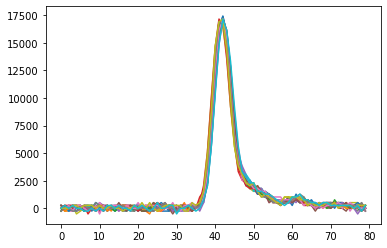

In [55]:
#for i in range(len(my_profiles)):
#    plt.plot(my_profiles[i])
for i in range(len(my_profiles_new)):
    plt.plot(my_profiles_new[i])


80


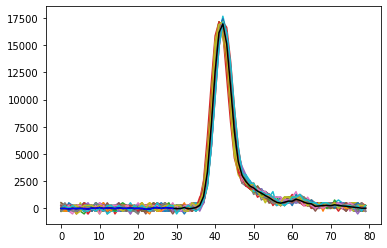

In [81]:
average_profile = get_average_profile(my_profiles)
for i in range(len(my_profiles)):
    plt.plot(my_profiles[i])
plt.plot(average_profile, c='k')
plt.plot(average_profile[0:30], c='b')

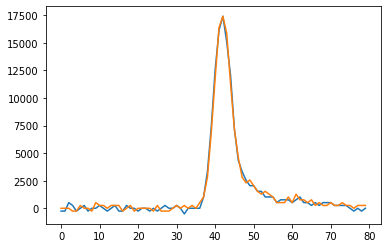

In [84]:
plt.plot(my_profiles[20])
plt.plot(my_profiles[-20])

In [49]:
my_profiles[:-20:, :]

array([[   0,  256, -256, ..., -256,  256, -256],
       [   0, -256,  256, ...,    0,  256,    0],
       [   0,    0,    0, ...,  256,    0,    0],
       ...,
       [   0,  512,    0, ...,  512,    0,    0],
       [-256, -256,    0, ...,  256,    0,  256],
       [   0,    0,    0, ...,    0,    0,    0]])

In [50]:
my_profiles

array([[   0,  256, -256, ..., -256,  256, -256],
       [   0, -256,  256, ...,    0,  256,    0],
       [   0,    0,    0, ...,  256,    0,    0],
       ...,
       [-256,    0,    0, ...,    0,  512, -256],
       [   0,    0,    0, ...,  256,  256,  256],
       [   0,  256,    0, ...,  256, -256,  256]])

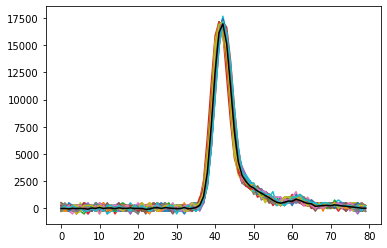

In [51]:
for i in range(len(my_profiles)):
    plt.plot(my_profiles[i])
average_profile = get_average_profile(my_profiles)
plt.plot(average_profile, 'k')

In [24]:
mr_overview = pickle.load(open('mr_overview.pkl', 'rb'))

In [32]:
mr_overview['LHCMD4']['mu0']

array([  0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,
         0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,
         0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,
         0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,
         0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,
         0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,
         0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,
         0.5 ,   0.75,  -7.  ,  -5.25,  -9.5 ,  -9.  ,  -3.5 ,  -9.75,
         0.25,   0.25,   0.25,   0.25,   0.25,   0.25, -10.  ,  -5.75,
        -4.75,   4.25,   1.  ,  -2.25,   6.5 ,  -5.5 ,  -5.  ,   0.25,
         0.25,   0.25,   0.25,  -9.75,   3.  ,  -7.25,   0.5 ,   0.5 ,
         0.5 ,   0.25,   0.5 ,   0.5 ,   0.5 ,   0.5 ,  -5.  ,  -5.25,
        -3.5 ,  -8.25,  -7.75,   0.  ,   0.25,   0.25,   0.25,   0.25,
         0.25,   0.25,   0.25,   3.25,   4.5 ,   5.  ,   0.5 ,   0.5 ,
      

In [22]:
len(mr_overview['LHCMD4']['avg_profile'])

394

In [24]:
mr_overview['LHCMD4']['avg_profile'][0]

7.039999999999992

In [ ]:
  def get_average_profile(self):
        average_profile = np.mean(self.value[-20:,:],axis=0)
        baseline = np.mean(average_profile[0:20])
        average_profile -= baseline
        return average_profile
